In [2]:
import torch
from torch import nn

from torchvision import datasets #from torchvision get FashionMNIST
from torch.utils.data import DataLoader #to wrap an iterable around the dataset - for convenience
from torchvision.transforms import ToTensor # convert2tensor

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# train_data:
train_data = datasets.FashionMNIST(root="data", train = True, download = True, transform = ToTensor() )

train_data
train_data.data.shape
np.unique(train_data.targets, return_counts = True)
# labels:                                 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
# # of samples in our epoch: array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

100%|██████████| 26421880/26421880 [00:02<00:00, 12571714.36it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 232780.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4253304.49it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4836979.61it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [4]:
# test_data:
test_data = datasets.FashionMNIST(root= "data",  train = False, download = True, transform = ToTensor() )     # train = FALSE
train_data.data.shape
np.unique(test_data.targets, return_counts = True)
# labels:                         (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
# # of samples in our epoch: array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [5]:
# DataLoader wraps an iterable over dataset, and has batching, sampling, shuffling, ...

# to Train the train_data:

train_dataloader = DataLoader(dataset= train_data, batch_size = 64)
test_dataloader  = DataLoader(dataset= test_data,  batch_size = 64)


In [6]:
train_dataloader.dataset
# Dataset FashionMNIST
#     Number of datapoints: 60000
#     Root location: data
#     Split: Train
#     StandardTransform
# Transform: ToTensor()
len(train_dataloader.dataset) #train = 60k Datapoints


#BUT in dataloader ITSELF its different
len(train_dataloader)
# 938  --> 60,000/64(each batch is 64 samples) = 937.5 -->  937x[Batches(each 64smpl)] + 1x[Batch (32smpl)])
# ===> dataloader batched up the BIG 60K data into 938 batches, each being 64 samples.

for batch, (x, y) in enumerate(train_dataloader):
  print(batch + 1)
  print(f"shape of x: {x.shape}")
  print(f"shape of y: {y.shape} & dtype of y: {y.dtype}")

1
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
2
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
3
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
4
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
5
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
6
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
7
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
8
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
9
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
10
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
11
shape of x: torch.Size([64

In [40]:
# To define a Neural Network in Pytorch, we create a class that inherits from nn.Module.

class FashionCNN(nn.Module):

  def __init__(self):
    # define the layers of the network in the ___init__ function

    super().__init__()  # super() to inherit methods from nn.Module

    #Flattening
    self.flatten = nn.Flatten()  # for convolutional network dealing with A BIG TENSOR of IMAGE, we simplify it and flatten this Tensor(not even a matrix lol) to 1D (a vector)

    #The NN Architecture with Activation functions
    # Self.linear_relu_stack = nn.Sequential(
    #     nn.Linear(in_features = 28*28,
    #               out_features = 512),
    #     nn.ReLU(),
    #     nn.Linear(in_features = 512,
    #               out_features = 512),
    #     nn.ReLU(),
    #     nn.Linear(in_features = 512,
    #               out_features = 10)
    # )
    self.fc1 = nn.Linear(in_features=28*28, out_features=512)  # First fully connected layer
    self.fc2 = nn.Linear(in_features=512, out_features=512)    # Second fully connected layer
    self.fc3 = nn.Linear(in_features=512, out_features=10)     # Output layer for 10 labels(classes)

    # Define activation function
    self.relu = nn.ReLU()

  def forward(self,x): # we specify how the data will pass thru in the network
    x = self.flatten(x)        # make sure the input x tensor is flattened
    x = self.relu(self.fc1(x)) # Apply first layer, followed by ReLU activation
    x = self.relu(self.fc2(x)) # Apply second layer, followed by ReLU activation
    x = self.fc3(x)            # FINAL OUTPUT apply the third (output) layer (no activation function since this is usually followed by softmax or cross-entropy)
    return x


In [42]:
my_CNN = FashionCNN()
print(convModel)

FashionCNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


In [43]:
# loss function
loss_func = nn.CrossEntropyLoss()   # since our output layer is 10-label classification


In [44]:
opt = torch.optim.SGD(
    params = my_CNN.parameters(),
    lr = 1e-3
)

In [45]:
# Training Function:
def training(dataloader, model, loss_func, optimizer):
  # train my_CNN, while checking Loss
  size = len(dataloader.dataset) # 60K since there are 60K Training samples

  # Sets the module in training mode
  model.train()

  #feed forward - 1 batch at a time - get J
  for batch, (x,y) in enumerate(dataloader): #training 1 batch at a time to the entire NN
    pred = model(x)            # myCNN prediction - (output) y^
    loss = loss_func(pred, y)  # Loss Calculation - J

    # Backpropagation
    optimizer.zero_grad()      # sets the old gradient = 0,  start of next loop (prev g/d doesn't mix up w/ next g/d)
    loss.backward()            # computes the new g/d (obvi g/d is in reverse direction)
    optimizer.step()           # conduct one optimization step (does the wt+1 = wt - alpha*d(J)) (updates Ws for all neurons.

    # Check to see if Loss goes down as training (ff, backprog) loops
    if batch % 100 == 0:        # for every 100 batch
      loss = loss.item()        # Current loss J
      current = batch * len(x)  # How many total samples have we worked on so far (which batch * # of samples in current batch) = (batch 12 * 64 --> so far we seen 12 ta 64 samples) ITS ALL ABOUT SAMPLES (not batch)
      print(f"loss: {loss:>5f} at {current:>5d}/{size:>5d}")


In [48]:
def testing(test_dataloader, model, loss_func):
  # Evaluate myCNN with Testing data...
  # ... at the END of EACH EPOCH, by checking the Accuracy and Loss(J) of that EPOCH

  size = len(test_dataloader.dataset) # 10k testing set samples
  num_batch = len(test_dataloader) # [rmbr] in this function we have test_dataloader

  # sets model to evaluation mode
  model.eval() # in pytorch when model is in eval mode, it disables any behavior that's specific to training, and model layers behave correctly for inference or testing

  # we check from values = 0
  test_loss, correct = 0, 0

  with torch.no_grad():   #  do the following WITH this in mind that for now (for these few lines) dont do gradient descent bcz .no_grad().
    for x, y in test_dataloader:
      # prediction with myCNN
      pred = model(x)

      # accumulate loss and number of correct prediction
      test_loss += loss_func(pred, y).item()
      correct   += (pred.argmax(1) == y).type(torch.float).sum().item()

  # updated monitoring value
  test_loss = test_loss / num_batch  # AVG loss = each loss / batch number
  correct   = correct   / size   # Accuracy = TP + TN / ALL
  print(f"\n Test Evaluation: \n Accuracy: {(100*correct):>5f}%, \AVG loss {test_loss:>5f}\n")


In [49]:
# lets get dirty !!
# we use training() + testing() functions

epochs = 5

# TRAIN and TEST
for t in range(epochs):
  print(f"\n\n Epoch {t+1}  ----- \n")

  #train
  training(train_dataloader, my_CNN, loss_func, opt)

  #test
  testing(test_dataloader, my_CNN, loss_func)





 Epoch 1  ----- 

loss: 1.146400 at     0/60000
loss: 1.156197 at  6400/60000
loss: 0.970134 at 12800/60000
loss: 1.103112 at 19200/60000
loss: 0.970012 at 25600/60000
loss: 1.011136 at 32000/60000
loss: 1.039331 at 38400/60000
loss: 0.990591 at 44800/60000
loss: 1.028268 at 51200/60000
loss: 0.958823 at 57600/60000

 Test Evaluation: 
 Accuracy: 66.580000%, \AVG loss 0.973332



 Epoch 2  ----- 

loss: 1.026058 at     0/60000
loss: 1.060041 at  6400/60000
loss: 0.856602 at 12800/60000
loss: 1.012701 at 19200/60000
loss: 0.885561 at 25600/60000
loss: 0.917639 at 32000/60000
loss: 0.964206 at 38400/60000
loss: 0.916957 at 44800/60000
loss: 0.950588 at 51200/60000
loss: 0.892975 at 57600/60000

 Test Evaluation: 
 Accuracy: 67.930000%, \AVG loss 0.901882



 Epoch 3  ----- 

loss: 0.937918 at     0/60000
loss: 0.992515 at  6400/60000
loss: 0.774965 at 12800/60000
loss: 0.947962 at 19200/60000
loss: 0.828466 at 25600/60000
loss: 0.848661 at 32000/60000
loss: 0.910940 at 38400/60000
loss

In [50]:
 '''
 in Epoch 1, Training Loss > 2
 in Epcoh 5, Training loss < 1.5  ((GREAT))


 Test Accuracy increases with each Epoch

 The final test accuracy is only 71% (not the best)
 Can improve !!
'''


'\nin Epoch 1, Training Loss > 2\nin Epcoh 5, Training loss < 1.5  ((GREAT))\n\n\nTest Accuracy increases with each Epoch\n\nThe final test accuracy is only 71% (not the best)\nCan improve !!\n'

myCNN predicted Coat; while truth is actually Coat


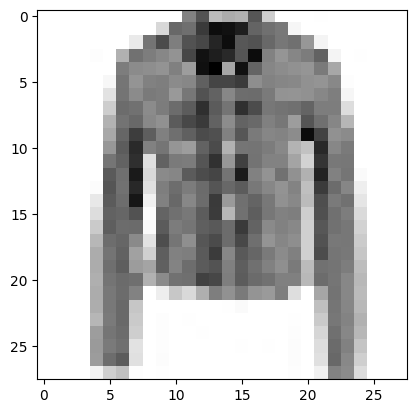

In [61]:
# Visualize + Predict


# In FashionMNIST we have 10 labels:

labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Snearker",
    "Bag",
    "Ankle boot",
]


# set the image you wanna predict
which_image = 10


plt.imshow(test_data.data[which_image], cmap = "Greys")  # data[0] show very first image
# pixel data
x = test_data[which_image][0]
# true / correct label
y = test_data[which_image][1]

# let's make prediction
with torch.no_grad():   # dont make CNN busy with G/D calculations for now
  y_pred = my_CNN(x)
  prediction = labels[y_pred[0].argmax(0)] # find predicted label
  true_outcome = labels[y]

  print(f"myCNN predicted {prediction}; while truth is actually {true_outcome}")